In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage, misc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import seaborn as sns

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
label_dict = {'red':0, 'yellow':1, 'green':2, 'other':3}
label_dict_reverse = dict((v,k) for k,v in label_dict.iteritems())

In [4]:
def load_dataset(data_path, test_size=0.1):
    data = []
    label = []
    for d in os.listdir(data_path):
        if(os.path.isdir(os.path.join(data_path, d))):
            class_name = d
            for fname in os.listdir(os.path.join(data_path, d)):
                if fname.endswith("jpg"):
                    image = np.array(ndimage.imread(os.path.join(data_path, d, fname), flatten=False))
                    image_resized = misc.imresize(image, (300, 400))
                    data.append(image_resized)
                    label.append(label_dict[class_name])

    one_hot_encoded = np_utils.to_categorical(label)

    X_train, X_test, y_train, y_test = train_test_split(np.array(data), one_hot_encoded, random_state=42, test_size=test_size)
    
    return X_train, X_test, y_train, y_test

In [5]:
#!tar xzf simulator.tgz

In [6]:
X_train, X_test, y_train, y_test = load_dataset("simulator", test_size=0.1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  # Remove the CWD from sys.path while we load stuff.


In [7]:
# Normalize image vectors
X_train = X_train/255.
X_test = X_test/255.

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 1770
number of test examples = 197
X_train shape: (1770, 300, 400, 3)
Y_train shape: (1770, 4)
X_test shape: (197, 300, 400, 3)
Y_test shape: (197, 4)


In [8]:
def SimpleModel(input_shape, num_classes):
    """
    Implementation of the SimpleModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset
    num_classes

    Returns:
    model -- a Model() instance in Keras
    """    
    model = Sequential()
    model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    
    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [9]:
simpleModel = SimpleModel(X_train[0].shape, y_train[0].shape[0])
simpleModel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [10]:
simpleModel.fit(x=X_train, y=y_train, epochs=40, batch_size=24, shuffle=True)

Epoch 1/40
1770/1770 [==============================] - 11s - loss: 6.2236 - acc: 0.5158    
Epoch 2/40
1770/1770 [==============================] - 8s - loss: 0.8616 - acc: 0.6695     
Epoch 3/40
1770/1770 [==============================] - 8s - loss: 0.5746 - acc: 0.7876     
Epoch 4/40
1770/1770 [==============================] - 8s - loss: 0.3915 - acc: 0.8480     
Epoch 5/40
1770/1770 [==============================] - 8s - loss: 0.3332 - acc: 0.8706     
Epoch 6/40
1770/1770 [==============================] - 8s - loss: 0.2928 - acc: 0.8853     
Epoch 7/40
1770/1770 [==============================] - 8s - loss: 0.2171 - acc: 0.9079     
Epoch 8/40
1770/1770 [==============================] - 8s - loss: 0.1970 - acc: 0.9192     
Epoch 9/40
1770/1770 [==============================] - 8s - loss: 0.1797 - acc: 0.9220     
Epoch 10/40
1770/1770 [==============================] - 8s - loss: 0.1630 - acc: 0.9339     
Epoch 11/40
1770/1770 [==============================] - 8s - loss: 0

In [11]:
preds = simpleModel.evaluate(x=X_test,y=y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

197/197 [==============================] - 0s     
Loss = 0.45451155652854647
Test Accuracy = 0.9086294419269272


In [12]:
# serialize model to JSON
model_json = simpleModel.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
simpleModel.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [13]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [14]:
#compile loaded model
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
preds = loaded_model.evaluate(x=X_test,y=y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

192/197 [============================>.] - ETA: 0sLoss = 0.45451155652854647
Test Accuracy = 0.9086294419269272


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


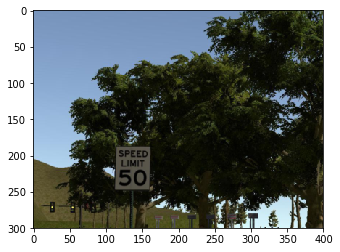

In [19]:
test_image = np.array(ndimage.imread('simulator/yellow/1145.jpg', flatten=False))
ti = misc.imresize(test_image, (300, 400))
plt.imshow(ti)

In [20]:
ti = ti/255.
ti = ti.reshape(1, 300, 400, 3)
encoded_label = loaded_model.predict_proba(ti)
label_idx = np.argmax(encoded_label)
label_dict_reverse[label_idx]

1/1 [==============================] - 0s


'yellow'